# Capstone Project 2021 DATA 606
## Topic:  Network Intrusion Detection System with Machine Learning Approach
### Student: Edwin Valdez 

#### Second Phase Progress 

In [1]:
# Importing Libraries that we are going to use for the implementation of our project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import load_model
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
# Indexes to apply to our dataset since it just contains data
features = ["srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","attack_cat","Label"]

In [4]:
# NB15_DATA in break down into 4 small datasets since the amount of data is large, here we are exporting each datasets 
NB15_data1 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_1.csv", header=None, names=features)
NB15_data2 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_2.csv", header=None, names=features)
NB15_data3 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_3.csv", header=None, names=features)
NB15_data4 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_4.csv", header=None, names=features)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# showing how much data each csv contain, this more for statistical purpose.
print("This is the shape of NB15_data1: " + str(NB15_data1.shape))
print("This is the shape of NB15_data2: " + str(NB15_data2.shape))
print("This is the shape of NB15_data3: " + str(NB15_data3.shape))
print("This is the shape of NB15_data4: " + str(NB15_data4.shape))

This is the shape of NB15_data1: (700001, 49)
This is the shape of NB15_data2: (700001, 49)
This is the shape of NB15_data3: (700001, 49)
This is the shape of NB15_data4: (440044, 49)


In [6]:
# now we are going to combine all the dataset into one data for our transformation and handle of the information 
combined_datasets = pd.concat([NB15_data1,NB15_data2,NB15_data3,NB15_data4])
#combined_datasets = pd.concat([NB15_data1])

In [7]:
combined_datasets

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [8]:
# This command show what kind of data we have so far including some format in each column
combined_datasets.info(verbose=True, null_counts=True)

<ipython-input-8-1639bef3d6e6>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  combined_datasets.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540047 entries, 0 to 440043
Data columns (total 49 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   srcip             2540047 non-null  object 
 1   sport             2540047 non-null  object 
 2   dstip             2540047 non-null  object 
 3   dsport            2540047 non-null  object 
 4   proto             2540047 non-null  object 
 5   state             2540047 non-null  object 
 6   dur               2540047 non-null  float64
 7   sbytes            2540047 non-null  int64  
 8   dbytes            2540047 non-null  int64  
 9   sttl              2540047 non-null  int64  
 10  dttl              2540047 non-null  int64  
 11  sloss             2540047 non-null  int64  
 12  dloss             2540047 non-null  int64  
 13  service           2540047 non-null  object 
 14  Sload             2540047 non-null  float64
 15  Dload             2540047 non-null  float64
 16  S

In [9]:
# I will drop all these columns because so far I don't believe it would be significant for model.
combined_datasets.drop(columns= ['srcip','sport','dstip','dsport','ct_ftp_cmd'], inplace=True)

In [10]:
# This function would be significant when I want to remove all the null values and change it to normal
def get_rid_of_nulls(value):
    if pd.isnull(value):
        return 'Normal'
    else:
        return value
combined_datasets['attack_cat']=combined_datasets['attack_cat'].apply(get_rid_of_nulls)

In [11]:
# Result when we change null to "normal"
combined_datasets.isnull().sum()

proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports           0
ct_state_ttl              0
ct_flw_http_mthd    1348145
is_ftp_login        1429879
ct_srv_src          

In [12]:
combined_datasets['attack_cat'] = combined_datasets['attack_cat'].str.strip()
combined_datasets['attack_cat'].value_counts()

Normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             1795
Shellcode            1511
Backdoors             534
Worms                 174
Name: attack_cat, dtype: int64

In [13]:
# This function would be significant when I want to remove all the null values and change it to normal
def checkValue(value):
    if 'Backdoors' in value:
        #print(value)
        return 'Backdoor'
    else:
        return value
combined_datasets['attack_cat']=combined_datasets['attack_cat'].apply(checkValue)

In [14]:
combined_datasets['attack_cat'].value_counts()

Normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: attack_cat, dtype: int64

<Figure size 432x288 with 0 Axes>

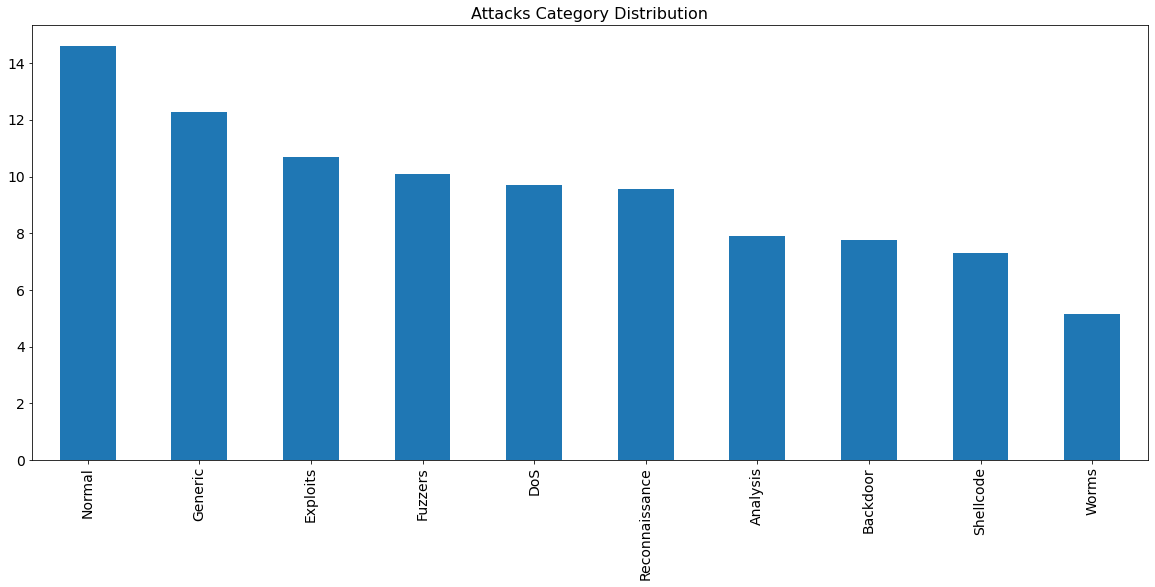

In [15]:
# Distribution grap of the sub-category of attack according to data provided for this project
plt.clf()
plt.figure(figsize=(20,8))
params = {'axes.titlesize':'16','xtick.labelsize':'14','ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Attacks Category Distribution')
combined_datasets['attack_cat'].value_counts().apply(np.log).plot(kind='bar')
plt.show()

<AxesSubplot:>

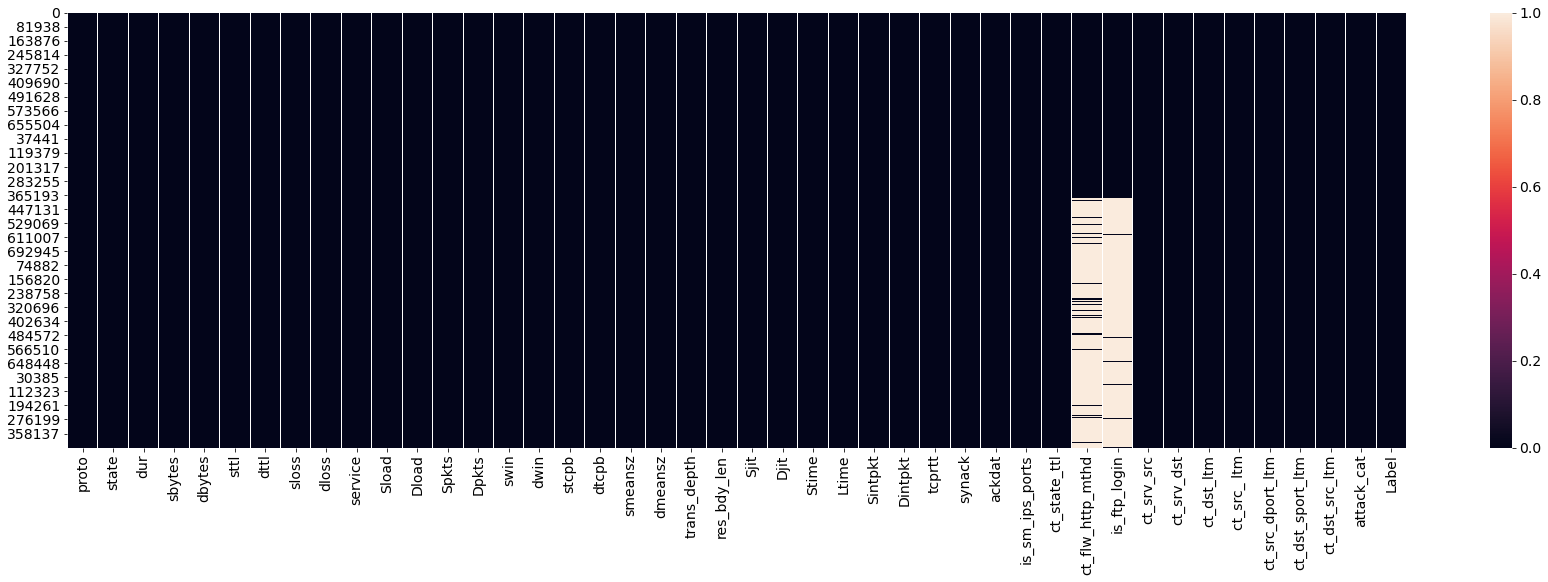

In [16]:
# applying a heat map to see where we have more null value in order to determine if the dataset that we have is good
# to continue of we need to implement some transformation method. 
plt.subplots(figsize=(30,8))
sns.heatmap(combined_datasets.isnull())

Text(0.5, 1.0, 'Correlation Matrix')

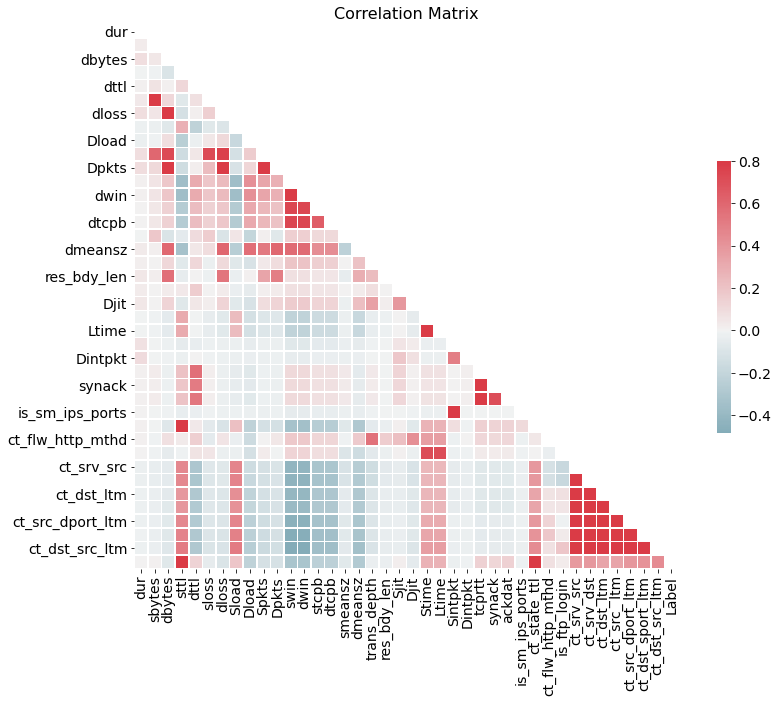

In [17]:
#putting in a different variable the correlation matrix
# checking the correlation value for each variable 
# helps to determine if we have a good data for our neural network model
corr = combined_datasets.corr()
#plotting the correlation matrix
dfMask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(14,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#using sns heatmap for the plotting
sns.heatmap(corr,mask=dfMask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix', fontsize = 16)

In [18]:
data_to_use = combined_datasets
combined_datasets = combined_datasets.dropna()
print(data_to_use.shape)
print(combined_datasets.shape)

(2540047, 44)
(1087203, 44)


In [19]:
#pd.set_option('display.max_columns', None)
combined_datasets

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,udp,CON,0.001055,132,164,31,29,0,0,dns,...,0.0,3,7,1,3,1,1,1,Normal,0
1,udp,CON,0.036133,528,304,31,29,0,0,-,...,0.0,2,4,2,3,1,1,2,Normal,0
2,udp,CON,0.001119,146,178,31,29,0,0,dns,...,0.0,12,8,1,2,2,1,1,Normal,0
3,udp,CON,0.001209,132,164,31,29,0,0,dns,...,0.0,6,9,1,1,1,1,1,Normal,0
4,udp,CON,0.001169,146,178,31,29,0,0,dns,...,0.0,7,9,1,1,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387197,tcp,CON,0.308446,31366,2566,31,29,15,6,smtp,...,0.0,1,1,2,1,1,1,1,Normal,0
387198,tcp,FIN,0.006390,2054,2478,31,29,6,6,-,...,0.0,2,4,1,3,1,1,1,Normal,0
387199,tcp,FIN,0.222470,8928,320,31,29,4,1,ftp-data,...,0.0,3,3,2,3,1,1,2,Normal,0
387200,tcp,CON,0.004158,890,8896,31,29,2,4,http,...,0.0,1,1,2,2,1,1,2,Normal,0


The class ratio for the original data: 47.9:1 (1064988/22215)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


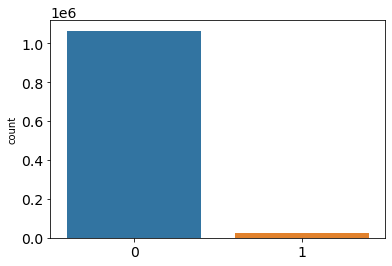

In [20]:
y2 = combined_datasets['Label'].values
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'
print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

In [21]:
unique, count = np.unique(y2, return_counts=True)
print(unique)
print(count)

[0 1]
[1064988   22215]


In [22]:
#pd.set_option('display.max_columns', True)

                    count       mean         std  min   25%   50%   75%  \
attack_cat                                                                
Analysis            526.0   3.387833    6.015675  2.0   2.0   2.0   2.0   
Backdoor            534.0   4.116105    9.868060  1.0   2.0   2.0   2.0   
DoS                1167.0  44.610111  370.400485  1.0   2.0   2.0  10.0   
Exploits           5409.0  42.166574  322.519618  1.0   8.0  10.0  22.0   
Fuzzers            5051.0  12.257177   29.358531  1.0   2.0  10.0  12.0   
Generic            7522.0   3.779713   33.241798  1.0   2.0   2.0   2.0   
Normal          1064988.0  41.250430   70.982283  0.0   4.0  18.0  52.0   
Reconnaissance     1759.0   6.940875    5.713876  1.0   2.0  10.0  10.0   
Shellcode           223.0   5.941704    3.984340  2.0   2.0   2.0  10.0   
Worms                24.0  18.333333   24.563435  2.0  10.0  10.0  10.0   

                    max  
attack_cat               
Analysis           82.0  
Backdoor          110

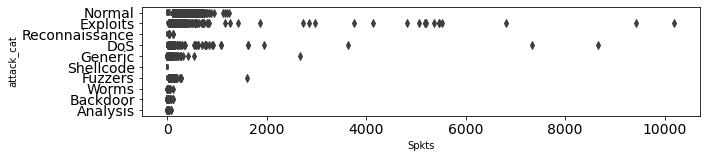

In [23]:
def plot(fn, height, data, label, col, scale='', with_outliers=True, xlim=[], bins=10):
    fig, ax = plt.subplots(figsize=(10, height))
    d = data if with_outliers else remove_outliers(data, col)
    if xlim:
        ax.set_xlim(xlim)
    if scale:
        ax.set(xscale=scale)
    fn(d, label, col, ax, bins)
    plt.show()
def plot_box(data, label, col, scale='', with_outliers=True, xlim=[]):
    plot(lambda d, l, c, ax, b: sns.boxplot(y=l, x=c, data=d, ax=ax, orient='h', width=0.4), 2, data, label, col, scale, with_outliers, xlim)
def plot_stats(data, label, col, no_outliers=False):
    print(data.groupby(label)[col].describe())
    plot_box(data, label, col)
plot_stats(combined_datasets, 'attack_cat', 'Spkts')

                    count       mean         std  min  25%   50%   75%  \
attack_cat                                                               
Analysis            526.0   0.942966    2.722845  0.0  0.0   0.0   0.0   
Backdoor            534.0   0.749064    3.141555  0.0  0.0   0.0   0.0   
DoS                1167.0  44.191088  461.513271  0.0  0.0   0.0   8.0   
Exploits           5409.0  30.651137  126.308015  0.0  6.0  10.0  22.0   
Fuzzers            5051.0   5.843595    7.978194  0.0  0.0   6.0   8.0   
Generic            7522.0   3.751928   59.365231  0.0  0.0   0.0   0.0   
Normal          1064988.0  54.570465  132.466393  0.0  4.0  18.0  49.0   
Reconnaissance     1759.0   4.314952    3.758458  0.0  0.0   6.0   8.0   
Shellcode           223.0   3.282511    3.393954  0.0  0.0   0.0   6.0   
Worms                24.0  67.333333  163.121365  0.0  6.0   6.0   8.0   

                    max  
attack_cat               
Analysis           16.0  
Backdoor           46.0  
DoS    

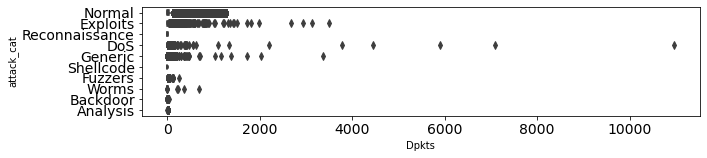

In [24]:
plot_stats(combined_datasets, 'attack_cat', 'Dpkts')

In [25]:
# spliting the data to be 80 % train and 20% test
trainDF, testDF = train_test_split(combined_datasets, test_size=0.2)

In [26]:
print(trainDF['attack_cat'].value_counts())
print('Total: '+ str(trainDF.shape[0]))
print('Total percentange of attack label from the total of record is: '+ str(trainDF['attack_cat'].loc[trainDF['attack_cat'] =='Normal'].shape[0]/trainDF.shape[0]))

Normal            852001
Generic             5964
Exploits            4368
Fuzzers             4050
Reconnaissance      1409
DoS                  908
Backdoor             437
Analysis             425
Shellcode            181
Worms                 19
Name: attack_cat, dtype: int64
Total: 869762
Total percentange of attack label from the total of record is: 0.9795794711656752


In [27]:
# I will hot econder those columns that would be significant to the model by I need a number representation of its string
#columns = ['proto','state', 'service', 'attack_cat' ]
columns = ['proto','state', 'service' ]
newDF_Train =trainDF[columns]
newDF_Test = testDF[columns]
combined_datasets.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            387192, 387193, 387194, 387195, 387196, 387197, 387198, 387199,
            387200, 387201],
           dtype='int64', length=1087203)

In [28]:
trainDF['attack_cat'].loc[trainDF['attack_cat'] =='Normal'].shape[0]

852001

In [29]:
# Function used to created new column names for the new categories
def createLabel(stringLine, check):
    #creating the new variable name for the column Name
    newCategory= stringLine
    newCat = newCategory +'-'
    dfSorted = sorted(check[stringLine].unique())
    #creating a unique category name for the column Name
    categoryName=[newCat + x for x in dfSorted]
    return categoryName

In [30]:
#creating the new column names for the new categories on the Train dataset
protocolNamesTrain = createLabel('proto',trainDF)
FlagNamesTrain = createLabel('state',trainDF)
ServiceNamesTrain = createLabel('service',trainDF)
combinationColumn_train = ServiceNamesTrain + FlagNamesTrain + protocolNamesTrain

In [31]:
newDF_Train.shape

(869762, 3)

In [32]:
#creating the new column names for the new categories on the Test dataset
protocolNamesTest = createLabel('proto',testDF)
FlagNamesTest = createLabel('state',testDF)
ServiceNamesTest = createLabel('service',testDF)
combinationColumns_Test = ServiceNamesTest + FlagNamesTest + protocolNamesTest

In [33]:
combinationColumns_Test

['service--',
 'service-dhcp',
 'service-dns',
 'service-ftp',
 'service-ftp-data',
 'service-http',
 'service-irc',
 'service-pop3',
 'service-radius',
 'service-smtp',
 'service-snmp',
 'service-ssh',
 'service-ssl',
 'state-ACC',
 'state-CLO',
 'state-CON',
 'state-ECO',
 'state-ECR',
 'state-FIN',
 'state-INT',
 'state-REQ',
 'state-RST',
 'state-URH',
 'state-URN',
 'proto-3pc',
 'proto-a/n',
 'proto-aes-sp3-d',
 'proto-any',
 'proto-argus',
 'proto-aris',
 'proto-arp',
 'proto-ax.25',
 'proto-bbn-rcc',
 'proto-bna',
 'proto-br-sat-mon',
 'proto-cbt',
 'proto-cftp',
 'proto-compaq-peer',
 'proto-cphb',
 'proto-cpnx',
 'proto-crtp',
 'proto-crudp',
 'proto-dcn',
 'proto-ddp',
 'proto-ddx',
 'proto-dgp',
 'proto-egp',
 'proto-eigrp',
 'proto-emcon',
 'proto-encap',
 'proto-etherip',
 'proto-fc',
 'proto-fire',
 'proto-ggp',
 'proto-gmtp',
 'proto-gre',
 'proto-hmp',
 'proto-i-nlsp',
 'proto-iatp',
 'proto-ib',
 'proto-icmp',
 'proto-idpr',
 'proto-idrp',
 'proto-igmp',
 'proto-igp',

In [34]:
newDF_Train.sample(10)

,proto,state,service
533903,tcp,FIN,-
672447,tcp,FIN,-
59931,tcp,FIN,-
7598,tcp,FIN,-
363447,udp,CON,dns
250061,tcp,FIN,-
260399,udp,CON,-
296707,tcp,FIN,http
167181,udp,CON,-
198282,tcp,FIN,-


In [35]:
entoder_trainer = newDF_Train.apply(LabelEncoder().fit_transform)
entoder_Test = newDF_Test.apply(LabelEncoder().fit_transform)

In [36]:
# Function used to create a new df with the enconded df
def helperCreationCate(dfEnconded, colunmNames):
    hotEncoder = OneHotEncoder(categories='auto')
    newDfEnconded =  hotEncoder.fit_transform(dfEnconded)
    dataframe = pd.DataFrame(newDfEnconded.toarray(),columns=colunmNames)
    return dataframe

In [37]:
#creating the new df with the new categories added to the train dataset
categorical_df = helperCreationCate(entoder_trainer, combinationColumn_train)

In [38]:
#creating the new df with the new categories added to the test dataset
categorical_testDF = helperCreationCate(entoder_Test, combinationColumns_Test)

In [39]:
#function to check which new catergory is missing on the test dataset
def misserChecker(trainDF, testDF, stringSTR, name):
    #adding the train and test data set to a list to check for the missing columns
    trainning = trainDF[stringSTR].tolist()
    testing = testDF[stringSTR].tolist()
    #finding the values missing on the test dataset
    missingList = list(set(trainning) - set(testing))
    checkCategory = stringSTR+'_'
    #finding the missing columns
    totalColumns=[checkCategory + x for x in missingList]
    print(f'This are the columns that are missing {name} and its data sets are:')
    print(str(totalColumns) + '\n')
    return totalColumns

In [40]:
#checking which columns are missing on the train dataset
finding11= misserChecker(testDF,trainDF,'proto', 'train')
finding22= misserChecker(testDF,trainDF, 'state', 'train')
finding33= misserChecker(testDF,trainDF,'service', 'train')
# finding44= misserChecker(testDF,trainDF,'attack_cat', 'train')

This are the columns that are missing train and its data sets are:
[]

This are the columns that are missing train and its data sets are:
[]

This are the columns that are missing train and its data sets are:
[]



In [41]:
#checking which columns are missing on the test dataset
finding1= misserChecker(trainDF, testDF,'proto', 'test')
finding2= misserChecker(trainDF, testDF,'state','test')
finding3= misserChecker(trainDF, testDF,'service', 'test')
# finding4= misserChecker(trainDF, testDF,'attack_cat', 'test')

This are the columns that are missing test and its data sets are:
['proto_ifmp', 'proto_esp', 'proto_wb-expak', 'proto_idpr-cmtp', 'proto_tlsp', 'proto_rtp', 'proto_st2', 'proto_chaos', 'proto_sm']

This are the columns that are missing test and its data sets are:
['state_TXD', 'state_PAR', 'state_MAS', 'state_no', 'state_TST']

This are the columns that are missing test and its data sets are:
[]



In [42]:
#function to add the missing column to a df
def concactColumns(dataframe, listColumns):
    #loop to add the missing column and put 0 on them
    new_df = dataframe
    for columnName in listColumns:
        new_df[columnName] = 0
    return new_df

In [43]:
#adding the missing columns on the df categorical
trainDFCatFinal = concactColumns(categorical_df, finding11)
trainDFCatFinal = concactColumns(categorical_df, finding22)
testDFCatFinal = concactColumns(categorical_testDF, finding1)
testDFCatFinal = concactColumns(categorical_testDF, finding2)
testDFCatFinal = concactColumns(categorical_testDF, finding3)

In [44]:
#now we get the same column shape for both train and test dataset 
print(trainDFCatFinal.shape)    
print(testDFCatFinal.shape)

(869762, 164)
(217441, 164)


In [45]:
trainDFCatFinal.head(5)

,service--,service-dhcp,service-dns,service-ftp,service-ftp-data,service-http,service-irc,service-pop3,service-radius,service-smtp,...,proto-visa,proto-vmtp,proto-vrrp,proto-wb-expak,proto-wb-mon,proto-wsn,proto-xnet,proto-xns-idp,proto-xtp,proto-zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Function to join the categorical and general df for train and test dataset.
#It will also replace the final label column with a numerical value
def optimizeDF(dfCheckOriginal, dfCheckCategorical):
    #joining the two datasets and droping the old object columns
    dfCheckOriginal = dfCheckOriginal.reset_index(drop=True)
    FinalDF=dfCheckOriginal.join(dfCheckCategorical)
    FinalDF.drop('proto', axis=1, inplace=True)
    FinalDF.drop('state', axis=1, inplace=True)
    FinalDF.drop('service', axis=1, inplace=True)
#     FinalDF.drop('attack_cat', axis=1, inplace=True)
    print(FinalDF.shape)
    return FinalDF

In [47]:
trainDFFinal = optimizeDF(trainDF, trainDFCatFinal)
testDFFinal = optimizeDF(testDF, testDFCatFinal)

(869762, 205)
(217441, 205)


In [48]:
#splitting the data into X and Y for the train dataset
trainX = trainDFFinal.drop('attack_cat',1)
trainY = trainDFFinal.attack_cat

In [49]:
#splitting the data into X and Y for the testing dataset
testX = testDFFinal.drop('attack_cat',1)
testY = testDFFinal.attack_cat

In [50]:
print(trainX.shape, testX.shape)
print(trainY.shape, testY.shape)

(869762, 204) (217441, 204)
(869762,) (217441,)


In [51]:
trainX.iloc[:]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,proto-visa,proto-vmtp,proto-vrrp,proto-wb-expak,proto-wb-mon,proto-wsn,proto-xnet,proto-xns-idp,proto-xtp,proto-zero
0,6.634885,25264,1094788,31,29,38,390,3.039450e+04,1.318501e+06,450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.259969,4112,2872,31,29,7,7,1.216760e+05,8.499475e+04,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000011,264,0,60,0,0,0,9.600000e+07,0.000000e+00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.037165,4862,75600,31,29,7,36,1.034306e+06,1.608416e+07,84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.005390,568,312,31,29,0,0,6.322820e+05,3.473098e+05,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869757,1.004925,1580,10168,31,29,3,5,1.153519e+04,7.645545e+04,12,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869758,0.001133,146,178,31,29,0,0,5.154457e+05,6.284201e+05,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869759,0.018027,2542,21006,31,29,7,14,1.100128e+06,9.100128e+06,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869760,0.017915,2438,20012,31,29,7,13,1.060117e+06,8.701535e+06,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#Function to create a scaled dataset
def formattingData(dfCheck):
    # setting the scale and returning the scaled df
    sc = preprocessing.StandardScaler().fit(dfCheck)
    dfScaled = sc.transform(dfCheck) 
    return dfScaled

In [53]:
#scaling the data
trainXedScaled=formattingData(trainX)
testXScaled=formattingData(testX)

In [54]:
#Function to create our Neural Network Model with 6 Hidden layers
def createModel():
    model = Sequential()
    #output dimension in my case would be 217 thanks for the shape of the trainX
    model.add(Dense(204,input_dim =204,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(154,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(104,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(54,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    # This would refers to the number of attack labels
    model.add(Dense(10,activation='softmax'))
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')
    return model

In [55]:
#variables for both models epochs and batchsize
epochs = 25
batch_size = 15
model = KerasClassifier(build_fn=createModel,epochs=epochs,batch_size=batch_size)

In [56]:
modelHistory= model.fit(trainXedScaled, trainY.values.ravel(), 
                         validation_data=(testXScaled, testY.values.ravel()),verbose=1, validation_split=0.1)

Epoch 1/25
52186/52186 [==============================] - 92s 2ms/step - loss: 0.1045 - accuracy: 0.9844 - val_loss: 0.0449 - val_accuracy: 0.9866
Epoch 2/25
52186/52186 [==============================] - 93s 2ms/step - loss: 0.0473 - accuracy: 0.9860 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 3/25
52186/52186 [==============================] - 93s 2ms/step - loss: 0.0357 - accuracy: 0.9862 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 4/25
52186/52186 [==============================] - 94s 2ms/step - loss: 0.0413 - accuracy: 0.9857 - val_loss: 0.0351 - val_accuracy: 0.9864
Epoch 5/25
52186/52186 [==============================] - 95s 2ms/step - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0351 - val_accuracy: 0.9864
Epoch 6/25
52186/52186 [==============================] - 93s 2ms/step - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0354 - val_accuracy: 0.9864
Epoch 7/25
52186/52186 [==============================] - 95s 2ms/step - loss: 0.0581 - accuracy: 0.9861 - val_loss: 0

In [57]:
 #function used to create quick graphs for a given column Name
def plotGraph(columnName):
    plt.title(columnName)
    df[columnName].value_counts().plot(kind="bar")

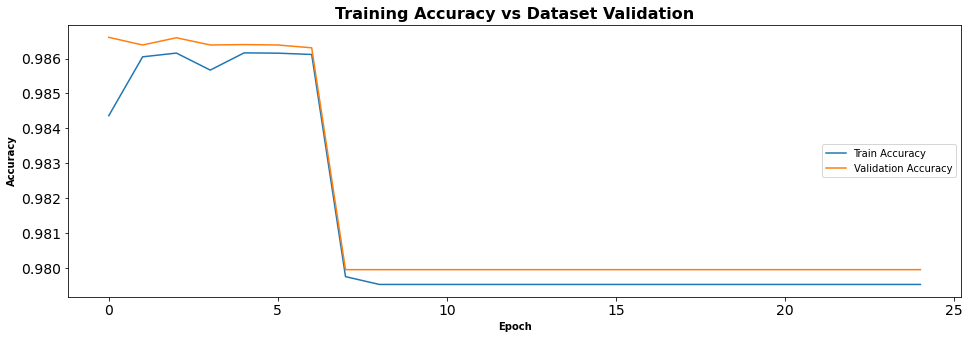

In [58]:
# plot the training/validation accuracy
fig = plt.figure(figsize = [16,5])
plt.title("Training Accuracy vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, epochs), modelHistory.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="right");
plt.show()

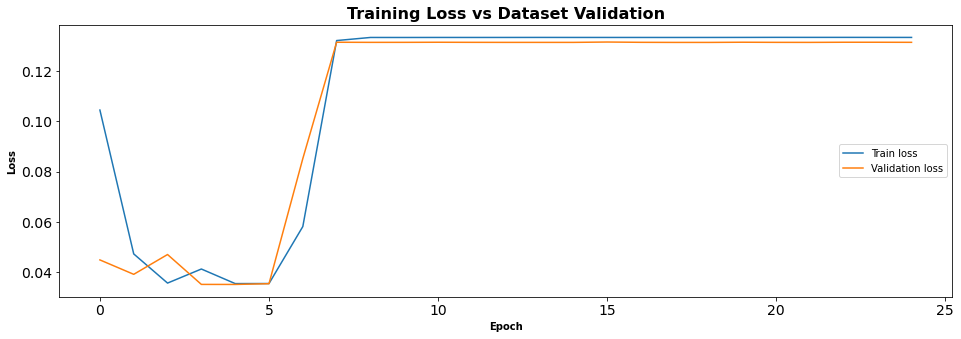

In [59]:
# plot the training/validation loss
fig= plt.figure(figsize = [16,5])
plt.title("Training Loss vs Dataset Validation", weight="bold")
plt.xlabel("Epoch", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.plot(np.arange(0, epochs), modelHistory.history["loss"], label="Train loss")
plt.plot(np.arange(0, epochs), modelHistory.history["val_loss"], label="Validation loss")
plt.legend(loc="right");
plt.show()